In [4]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
#import seaborn as sns

# 2 line below for pdf export
!pip install pyppeteer
!pyppeteer-install

chromium is already installed.


### Task 1: Join all the csv files into one dataset

In [5]:
#define path to CSV files
path = r'C:\Users\karol\sales_data'

#identify all CSV files
all_files = glob.glob(os.path.join("*.csv"))

#merge all CSV files into one DataFrame
sales_data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [6]:
sales_data.to_csv('all_data.csv')

In [7]:
sales_data.head(1)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.8
0,0.0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.9,Dallas (TX),8.0,46.0,NaN,NaN,NaN,NaN,NaN


In [8]:
sales_data = sales_data.drop(['Unnamed: 0', 'Unnamed: 0.4' ,'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0.8'], axis=1)
sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.9,Dallas (TX),8.0,46.0


In [9]:
sales_data.shape

(10863066, 11)

### Clean the data! 

   ### Drop rows of NAN

In [10]:
sales_data = sales_data.dropna(how='all')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas (TX),8.0,46.0
1,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston (MA),22.0,30.0
2,176560.0,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles (CA),14.0,38.0
3,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA),14.0,38.0
4,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA),9.0,27.0


### Find 'Or' and delete it

In [11]:
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas (TX),8.0,46.0
1,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston (MA),22.0,30.0
2,176560.0,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles (CA),14.0,38.0
3,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA),14.0,38.0
4,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles (CA),9.0,27.0


### Convert columns to the correct type

In [12]:
# Make float 
sales_data['Price Each'] = sales_data['Price Each'].astype('float')
sales_data['Price Each'].dtype

dtype('float64')

In [13]:
# convert to numeric
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Quantity Ordered'].dtype

dtype('int64')

In [14]:
# convert to int
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype('int64')
sales_data['Quantity Ordered'].dtype

dtype('int64')

### Augment data with additional columns

  ### Task 2: Add month column

In [15]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [16]:
# Extract months
sales_data['Month'] = sales_data['Order Date'].dt.month

In [17]:
sales_data['Month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10], dtype=int64)

In [18]:
sales_data['Month'].dtype

dtype('int64')

### Task 3: Add a sales column

In [19]:
sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8.0,46.0
1,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22.0,30.0
2,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14.0,38.0
3,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14.0,38.0
4,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9.0,27.0


### Task 4: Add a city column
     
  ###### Extract city and state from 'Purchase Address'  column

In [20]:
# get city
def get_city(address):
    return address.split(',')[1]

# get the state
def get_state(address):
    return address.split(',')[2].split(' ')[1]

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8.0,46.0
1,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22.0,30.0
2,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14.0,38.0
3,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14.0,38.0
4,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9.0,27.0


### Question 1: what was the best month for sales? How much was earned that month?

In [21]:
results = sales_data.groupby('Month').sum()
results

C:\Users\karol\AppData\Local\Temp\ipykernel_15488\3287185272.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,654210,1.087135e+08,1.093429e+08,8229658.0,16664598.0
2,806940,1.313331e+08,1.321213e+08,10187471.0,20938215.0
3,952352,1.563205e+08,1.572105e+08,12043427.0,24617389.0
4,1253943,2.054021e+08,2.068050e+08,15735460.0,32649290.0
5,1045497,1.756198e+08,1.765988e+08,13133015.0,26838570.0
6,893692,1.500901e+08,1.510178e+08,11263668.0,23181776.0
7,964280,1.579462e+08,1.588602e+08,12163939.0,24622599.0
8,820310,1.360489e+08,1.369104e+08,10337327.0,21230952.0
9,734164,1.167700e+08,1.174739e+08,9268305.0,18794955.0


In [22]:
# reset index
sales_data = sales_data.reset_index(drop=True)
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8.0,46.0
1,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22.0,30.0
2,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14.0,38.0
3,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14.0,38.0
4,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9.0,27.0


Text(0.5, 0, 'Month Number')

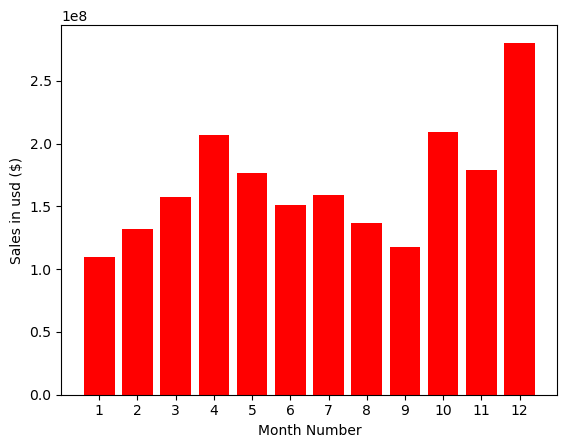

In [23]:
months = range(1,13)
plt.bar(months, results['Sales'], color='r')
plt.xticks(months)
plt.ylabel('Sales in usd ($)')
plt.xlabel('Month Number')


# Best month of sales is december

### Question 2: what city hasd the highest number of sales?

In [24]:
cities_sales = sales_data.groupby('City').sum()
cities_sales

C:\Users\karol\AppData\Local\Temp\ipykernel_15488\4256748263.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),969726,1.623387e+08,6109569,1.632437e+08,12302536.0,25436306.0
Austin (TX),651364,1.056754e+08,4071753,1.062425e+08,8147335.0,16600661.0
Boston (MA),1315601,2.125629e+08,8223975,2.139753e+08,16540567.0,33883985.0
Dallas (TX),976856,1.607159e+08,6096844,1.616118e+08,12301426.0,24967934.0
Los Angeles (CA),1943924,3.164677e+08,12139998,3.182914e+08,24534001.0,49748610.0
New York City (NY),1632080,2.708505e+08,10248292,2.725509e+08,20540095.0,42126909.0
Portland (ME),160763,2.609401e+07,1000020,2.624391e+07,2023350.0,4186760.0
Portland (OR),660091,1.087234e+08,4115821,1.093143e+08,8288767.0,16965850.0
San Francisco (CA),2935872,4.798431e+08,18397796,4.828205e+08,36948371.0,75781160.0


Text(0.5, 0, 'City name')

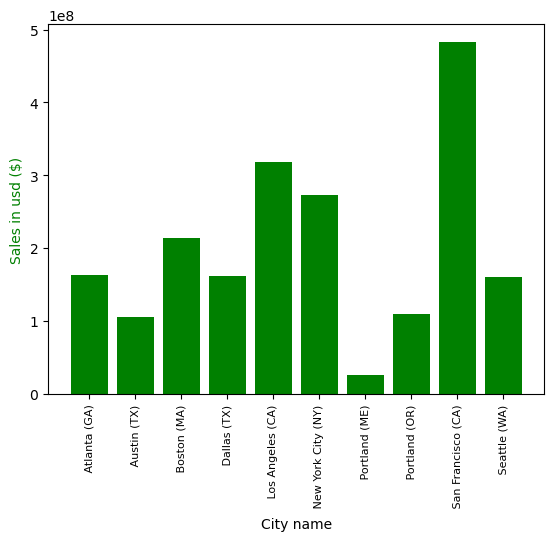

In [25]:
cities = [city for city, sales_data in sales_data.groupby('City')]
plt.bar(cities, cities_sales['Sales'],color='g')
plt.xticks(cities, rotation ='vertical', fontsize=8)
plt.ylabel('Sales in usd ($)', color='g')
plt.xlabel('City name')

# city with the highest sales is San Francisco (CA)

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying products?

In [26]:
# convert to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Order Date'].dtype

dtype('<M8[ns]')

### Task 5: create Hour and minutes column

In [27]:
sales_data['Hour'] = sales_data['Order Date'].dt.hour

In [28]:
sales_data['Minute'] = sales_data['Order Date'].dt.minute

In [29]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


Text(0.5, 0, 'Hour')

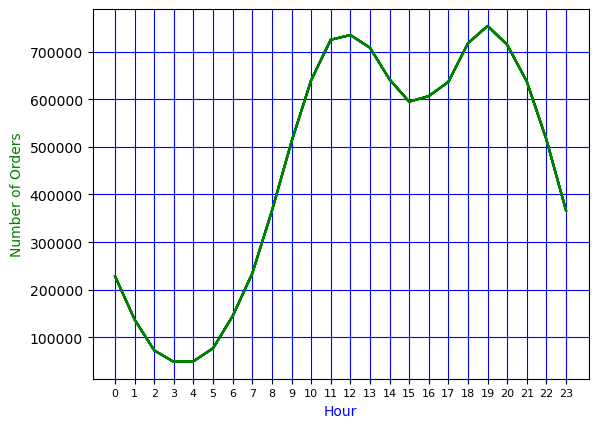

In [30]:
# groupby 'Hour' and Counted number of rows by each hour.
hours = [hour for hour, sales_data in sales_data.groupby('Hour')]
plt.plot(hours, sales_data.groupby(['Hour']).count(), color='g')
plt.xticks(hours, fontsize=8)
plt.grid(color='b')
plt.ylabel('Number of Orders', color='g')
plt.xlabel('Hour', color='b')

# My recomendantion is arround 11am (11) or 7pm (19)

### Question 4: What product sold the most? 

In [31]:
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered

# the most sold product: AAA Batteries (4-pack)
# number of times sold: 155.085

C:\Users\karol\AppData\Local\Temp\ipykernel_15488\3692990468.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Product
20in Monitor                   241177
27in 4K Gaming Monitor         364825
27in FHD Monitor               441009
34in Ultrawide Monitor         362329
AA Batteries (4-pack)         1614993
AAA Batteries (4-pack)        1811069
Apple Airpods Headphones       914749
Bose SoundSport Headphones     785869
Flatscreen TV                  281712
Google Phone                   323366
LG Dryer                        37821
LG Washing Machine              38910
Lightning Charging Cable      1356059
Macbook Pro Laptop             276026
ThinkPad Laptop                241209
USB-C Charging Cable          1400201
Vareebadd Phone                120950
Wired Headphones              1200719
iPhone                         400229
Name: Quantity Ordered, dtype: int64

Text(0.5, 0, 'Product Name')

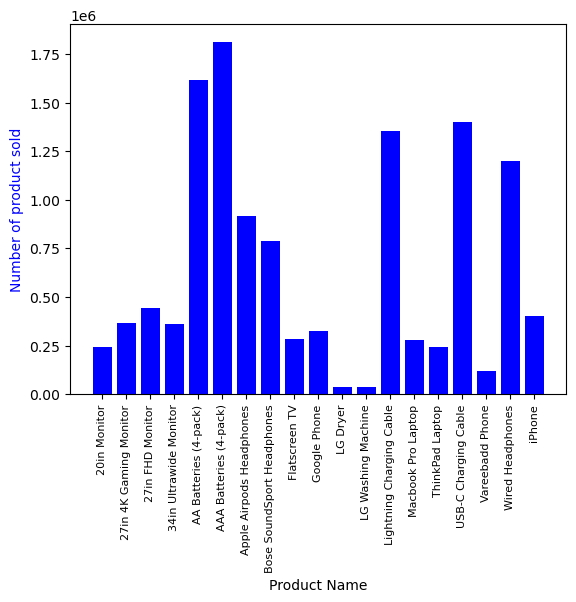

In [32]:
# bar chart
products = [product for product, sales_data in product_group]
plt.bar(products, quantity_ordered, color='b')
plt.xticks(products, rotation ='vertical', fontsize=8)
plt.ylabel('Number of product sold', color='b')
plt.xlabel('Product Name')


### Question 5: Why the AAA Batteries (4-pack) is the most sold product? 
   ###### number of times sold: 155.085

In [33]:
product_prices = sales_data.groupby('Product').mean()['Price Each']
print(product_prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\karol\AppData\Local\Temp\ipykernel_15488\1677660261.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



C:\Users\karol\AppData\Local\Temp\ipykernel_15488\2966143021.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\karol\AppData\Local\Temp\ipykernel_15488\2966143021.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



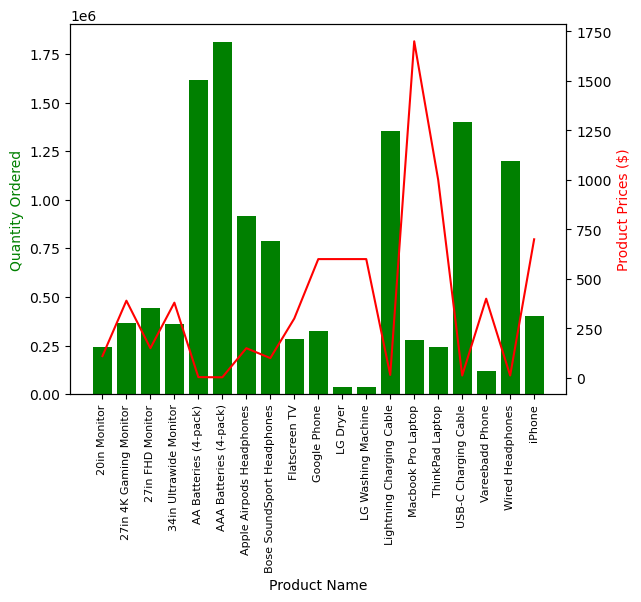

In [34]:
product_prices = sales_data.groupby('Product').mean()['Price Each']
#print(product_prices)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, product_prices, 'r-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Product Prices ($)', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()


###  The AAA Batteries (4-pack) it's the most cheap product:
#####  AAA Batteries (4-pack)  Price: 2.99$ 

As you can see in the graph above, when the product price is high, the quantity order is low.

When the product price is low, quantity ordered is high.

     Why Macbook Pro Laptop and ThinkPad Laptop prices are hight, but there's a high qunatity ordered?
One of the reasons is because, there's many students and business that need a computer to function.

In [35]:
short_sales_data = sales_data.head(100000)

In [36]:
short_sales_data.to_csv('2019_short_version_analysis.csv')

In [37]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
10862161,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
10862162,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
10862163,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
10862164,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30
